In [78]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud

nlp = spacy.load('en_core_web_sm')

In [71]:
df = pd.read_csv("train.csv")

df.sample(10)

,id,keyword,location,text,target
3947,5612,flooding,Vietnam,Cuban leader extends sympathy to Vietnam over ...,1
2276,3264,demolish,NaN,Ugh So hungry I'm going to demolish this food!,0
3711,5278,fear,NaN,The Opposite of Love is Fear HereÛªs Why\nhtt...,1
2045,2935,danger,Atlanta Georgia,@RemainOnTop #FETTILOOTCH IS #SLANGLUCCI OPPRE...,0
3836,5459,first%20responders,"Franklin, TN near Nashville",After shooting event at the theater @Starbucks...,1
456,659,attack,Dubai,@etribune US Drone attack kills 4-suspected m...,1
4634,6586,inundated,"England & Wales Border, UK",@Lenn_Len Probably. We are inundated with them...,0
2517,3617,desolation,St. Louis Mo.,Wow! I just won this for free The Hobbit: Deso...,0
5120,7301,nuclear%20reactor,"USA, North Dakota",Salem 2 nuclear reactor shut down over electri...,1
1341,1939,burning%20buildings,NaN,#KCA #VoteJKT48ID DUCKVILLELOL: Burning flips ...,0


In [72]:
def func1(doc):
    doc = doc.replace(nlp.Defaults.stop_words, '')
    
    docText = ""
    for line in doc:
        line = ' '.join(re.findall(r'\w{4,}',line))
        docText = docText + line + "\n"
    
    docTokens = nlp(docText)
    
    return docTokens

# Le document est maintenant complêt et traité avec la fonction
doc = func1(df['text'])
print (doc)

Deeds Reason this earthquake ALLAH Forgive
Forest fire near Ronge Sask Canada
residents asked shelter place being notified officers other evacuation shelter place orders expected
people receive wildfires evacuation orders California
Just sent this photo from Ruby Alaska smoke from wildfires pours into school
RockyFire Update California closed both directions Lake County fire CAfire wildfires
flood disaster Heavy rain causes flash flooding streets Manitou Colorado Springs areas
hill fire woods
There emergency evacuation happening building across street
afraid that tornado coming area
Three people died from heat wave
Haha South Tampa getting flooded WAIT SECOND LIVE SOUTH TAMPA WHAT GONNA WHAT GONNA FVCK flooding
raining flooding Florida TampaBay Tampa days lost count
Flood Bago Myanmar arrived Bago
Damage school multi crash BREAKING
What
love fruits
Summer lovely
fast
What goooooooaaaaaal
this ridiculous
London cool
Love skiing
What wonderful
LOOOOOOL
that shit
last week
Love girlfriend

In [73]:
len(doc)

85799

Je trouve un grand nombre de tokens, qui ne sont pas forcement en rapport avec les messages qui nous intéressent. On pourrait ajouter des tokens qui n'ont aucun rapport avec notre recherche dans la liste des stop words par défault, ce qui nous permetterai de les retirer.

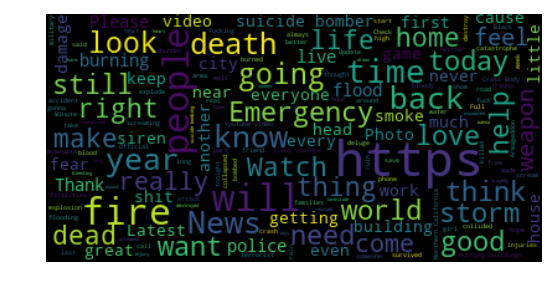

In [82]:
wordcloud = WordCloud().generate(str(doc))

wordcloud = WordCloud(max_font_size=40).generate(str(doc))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Je ne vois pas vraiment comment le Stemming ou Lemmatization pourrait être appliqué pour réduire le nombre des tokens